# Retail Transactions - Statistical Analysis
![img](img/img.png)
## Dataset Description :
* Customer Information:

    * CustomerID: A unique identifier for each customer. This allows you to track customer behavior across multiple transactions.
* Transaction Details:

    * ProductID: A unique identifier for each product sold. This allows you to analyze product-specific trends.

    * Quantity: The number of units of each product purchased in a single transaction.

    * Price: The unit price of each product.

    * TransactionDate: The date and potentially time of each transaction. This allows for analysis of temporal trends like seasonality.

    * PaymentMethod: The method used by the customer to pay for the transaction (e.g., credit card, debit card, cash). This can be useful for understanding customer preferences and optimizing payment options.
    StoreLocation: The location of the store where the transaction took place (e.g., city, branch). This allows for analysis of location-specific trends.

* Product Information:

    * ProductCategory: The category the product belongs to (e.g., clothing, electronics, furniture). This facilitates product grouping and analysis by category.

* Promotional Information:

    * DiscountApplied(%): The percentage discount applied to the transaction, if any. This allows you to assess the impact of promotions and discounts.

* Financial Information:

    * TotalAmount: The total amount paid for the transaction, considering any discounts applied. This is a crucial metric for revenue analysis.

## Data Exploration

In [2]:
setwd('data/')

In [3]:
data <- read.csv("Retail_Transaction_Dataset.csv")
head(data)

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied...,TotalAmount
,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,109318,C,7,80.07984,12/26/2023 12:32,Cash,"176 Andrew Cliffs Baileyfort, HI 93354",Books,18.677100,455.8628
2,993229,C,4,75.19523,8/5/2023 0:00,Cash,"11635 William Well Suite 809 East Kara, MT 19483",Home Decor,14.121365,258.3065
3,579675,A,8,31.52882,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909 Port Lauraland, MO 99563",Books,15.943701,212.0157
4,799826,D,5,98.88022,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500 Lake Tammy, MO 76234",Books,6.686337,461.3438
5,121413,A,7,93.18851,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143 Holand, VA 80142",Electronics,4.030096,626.0305
6,463050,D,3,54.09315,8/15/2023 4:24,Cash,"8492 Jonathan Drive North Robertshire, TN 67532",Electronics,10.888768,144.6092


**Types of the columns**

In [4]:
str(data)

'data.frame':	100000 obs. of  10 variables:
 $ CustomerID        : int  109318 993229 579675 799826 121413 463050 888163 843385 839609 184135 ...
 $ ProductID         : chr  "C" "C" "A" "D" ...
 $ Quantity          : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Price             : num  80.1 75.2 31.5 98.9 93.2 ...
 $ TransactionDate   : chr  "12/26/2023 12:32" "8/5/2023 0:00" "3/11/2024 18:51" "10/27/2023 22:00" ...
 $ PaymentMethod     : chr  "Cash" "Cash" "Cash" "PayPal" ...
 $ StoreLocation     : chr  "176 Andrew Cliffs\nBaileyfort, HI 93354" "11635 William Well Suite 809\nEast Kara, MT 19483" "910 Mendez Ville Suite 909\nPort Lauraland, MO 99563" "87522 Sharon Corners Suite 500\nLake Tammy, MO 76234" ...
 $ ProductCategory   : chr  "Books" "Home Decor" "Books" "Books" ...
 $ DiscountApplied...: num  18.68 14.12 15.94 6.69 4.03 ...
 $ TotalAmount       : num  456 258 212 461 626 ...


We have only one column with a false type which is $TransactionDate.

Let's fix it.

In [5]:
class(data$TransactionDate)

[1] "character"

In [6]:
data$TransactionDate <- as.Date(data$TransactionDate, format = "%d/%m/%Y %H:%M")

In [7]:
class(data$TransactionDate)

[1] "Date"

**Basic Descriptive Statistics**

In [8]:
summary(data)

   CustomerID      ProductID            Quantity         Price       
 Min.   :    14   Length:100000      Min.   :1.000   Min.   : 10.00  
 1st Qu.:250694   Class :character   1st Qu.:3.000   1st Qu.: 32.55  
 Median :499679   Mode  :character   Median :5.000   Median : 55.12  
 Mean   :500464                      Mean   :5.009   Mean   : 55.07  
 3rd Qu.:751105                      3rd Qu.:7.000   3rd Qu.: 77.46  
 Max.   :999997                      Max.   :9.000   Max.   :100.00  
                                                                     
 TransactionDate      PaymentMethod      StoreLocation      ProductCategory   
 Min.   :2023-01-05   Length:100000      Length:100000      Length:100000     
 1st Qu.:2023-05-08   Class :character   Class :character   Class :character  
 Median :2023-09-12   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2023-10-19                                                           
 3rd Qu.:2024-03-04                          

Now , we explored our data briefly and cleaned a bit .

Let's dive into analysis .

## Exploratory Data Analysis (EDA)

In [9]:
install.packages("ggplot2", dependencies=TRUE)
install.packages("magrittr", dependencies=TRUE)
install.packages("dplyr", dependencies=TRUE)

Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'sf'


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 7503872 != reported length 39897927"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/sf_1.0-16.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/sf_1.0-16.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'sf' failed"


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\RtmpqQQSPt\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Harou\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll to C:\Users\Harou\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\Harou\AppData\Local\Temp\RtmpqQQSPt\downloaded_packages


Installing package into 'C:/Users/Harou/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 1441792 != reported length 1582561"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.4/dplyr_1.1.4.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.4/dplyr_1.1.4.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'dplyr' failed"


In [10]:
library(ggplot2)
library(magrittr)
library(dplyr)
library(lubridate)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




**Product Category Distribution**

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


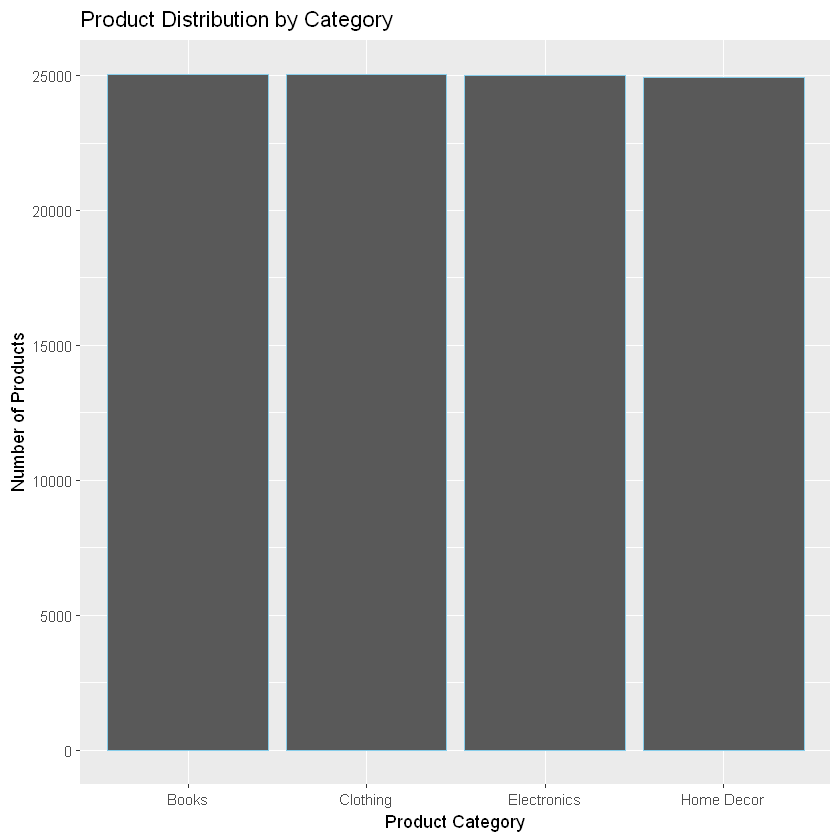

In [11]:
ggplot(data, aes(x = ProductCategory, y = ..count..)) +  
  geom_bar(stat = "count", color = "skyblue") +  
  labs(title = "Product Distribution by Category", x = "Product Category", y = "Number of Products")

***---> Evenly distributed***

**Price Distribution**

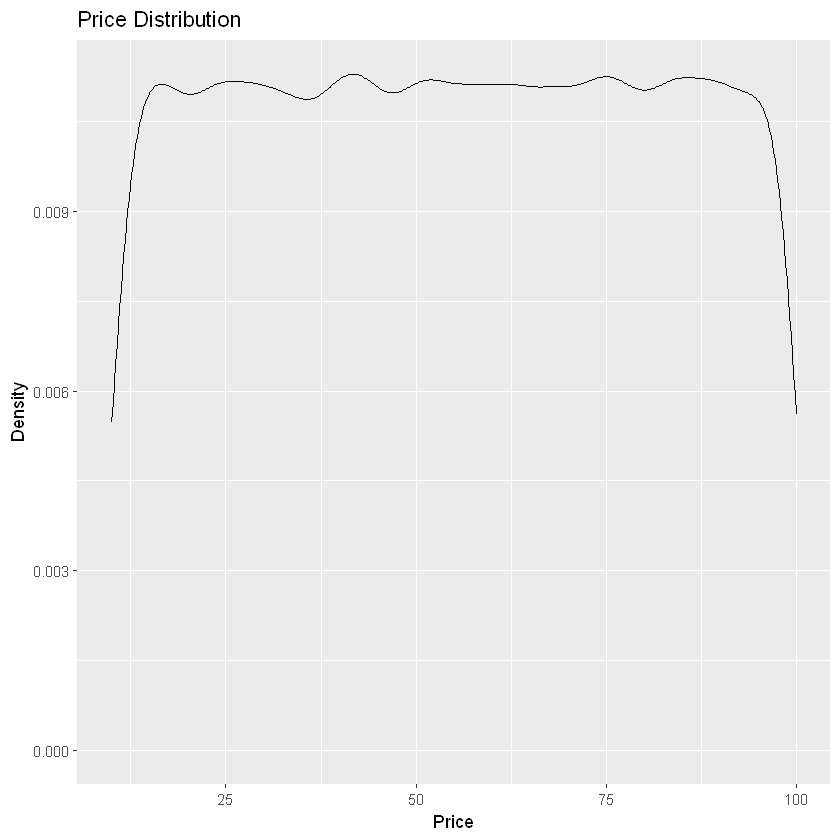

In [12]:
ggplot(data, aes(x = Price, y = after_stat(density))) +  
  geom_density(alpha = 0.5) +  
  labs(title = "Price Distribution", x = "Price", y = "Density")

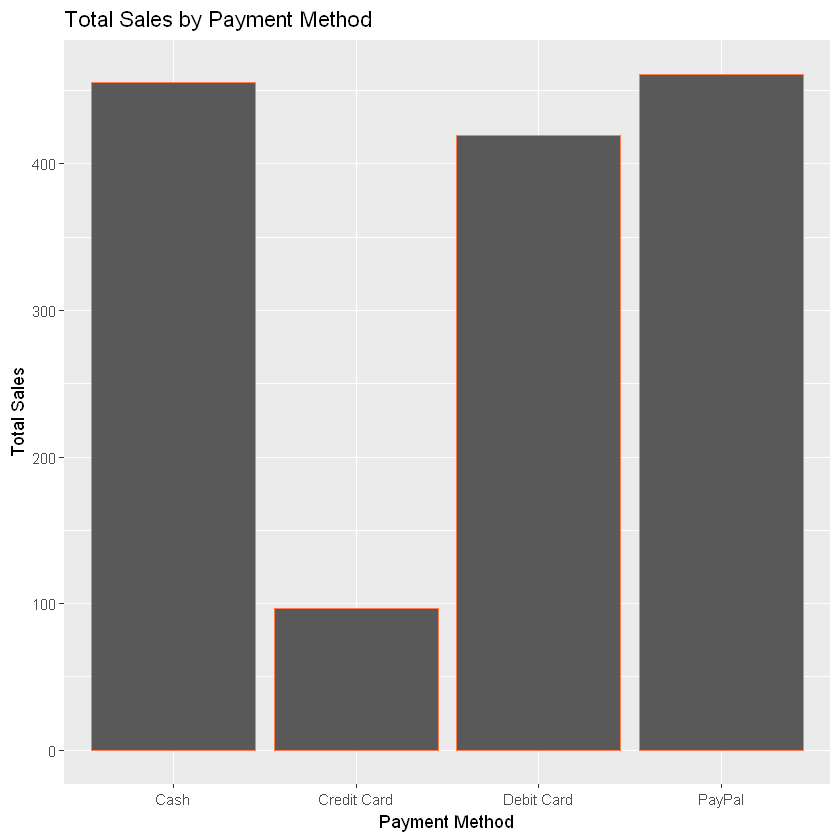

In [13]:
data %>%
  group_by(PaymentMethod) %>%
  summarise(total_sales = sum(ifelse(is.numeric(TotalAmount), TotalAmount, 0))) %>%  
  arrange(desc(total_sales)) %>%  
  ggplot(aes(x = PaymentMethod, y = total_sales)) +
  geom_bar(stat = "identity", color = "coral") +
  labs(title = "Total Sales by Payment Method", x = "Payment Method", y = "Total Sales")
